# Regularization

In this lab, we will see the impact of different regularization techniques on decision boundaries, seeing how they can be used to avoid overfitting.

Import all necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2024-11-18 18:09:37.324310: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 18:09:37.328251: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 18:09:37.340430: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731949777.358397   23963 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731949777.363409   23963 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 18:09:37.379020: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

We will build two non-linearly separable datasets for classification.

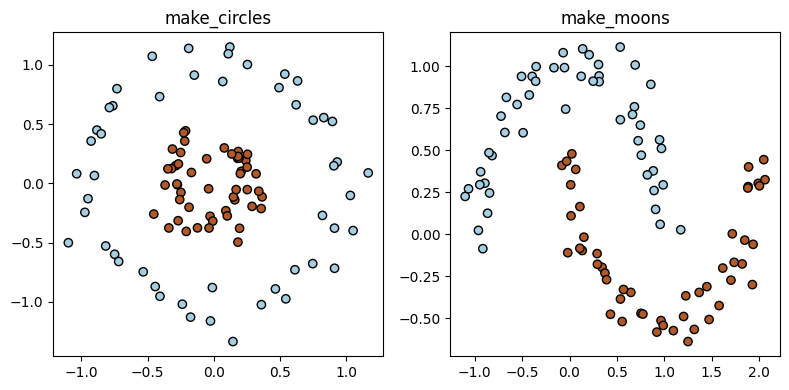

In [2]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

X_circles, Y_circles = make_circles(noise=0.1, factor=0.3, random_state=0)
ax1.scatter(X_circles[:, 0], X_circles[:, 1], c=Y_circles, cmap=plt.cm.Paired, edgecolor='k')
ax1.set_title("make_circles")

X_moons, Y_moons = make_moons(noise=0.1, random_state=0)
ax2.scatter(X_moons[:, 0], X_moons[:, 1], c=Y_moons, cmap=plt.cm.Paired, edgecolor='k')
ax2.set_title("make_moons")



plt.tight_layout()
plt.show()

Scale data and split each dataset into training and test.



In [3]:
# Preprocess datasets: scaling
scaler = StandardScaler()
X_circles = scaler.fit_transform(X_circles)
X_moons = scaler.fit_transform(X_moons)

# Split into train and test sets
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_circles, Y_circles, test_size=0.2, random_state=0)
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_moons, Y_moons, test_size=0.2, random_state=0)


Train two neural networks, one for each dataset, for label classification.

Suggested architecture:
* Both networks should have a sigmoid activation function in their output layer, as it is a binary classification.
* You can use binary_crossentropy loss, since we are performing binary classification with labels.
* The model to classify circles will most likely be more complex than the one to classify moons, since the decision boundary is more complex.
*For circles, an example can be three hidden layers with 32, 64, and 32 neurons each, all with ReLu.
*For moons, an example can be three hidden layers with 16 neurons each, all with ReLu.
*You can use Adam as an optimizer with 0.01 learning rate.

Plot the accuracy and loss over the epochs. Try to reach a very high accuracy on the training set.

In [4]:
# Circles model

# Input layer
input_circles = Input(shape=(2,))

# Hidden layers
x = Dense(32, activation='relu')(input_circles)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Output layer
output_circles = Dense(1, activation='sigmoid')(x)

# Model
model_circles = Model(inputs=input_circles, outputs=output_circles)

# Compile
model_circles.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


# Moons model

# Input layer
input_moons = Input(shape=(2,))

# Hidden layers
x = Dense(16, activation='relu')(input_moons)
x = Dense(16, activation='relu')(x)
x = Dense(16, activation='relu')(x)

# Output layer
output_moons = Dense(1, activation='sigmoid')(x)

# Model
model_moons = Model(inputs=input_moons, outputs=output_moons)

# Compile
model_moons.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


2024-11-18 18:09:39.294595: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
# Train circles model
history_circles = model_circles.fit(X_train_c, Y_train_c, validation_data=(X_test_c, Y_test_c), epochs=100, batch_size=32, verbose=1)

# Train moons model
history_moons = model_moons.fit(X_train_m, Y_train_m, validation_data=(X_test_m, Y_test_m), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6133 - loss: 0.6523 - val_accuracy: 0.4500 - val_loss: 0.5954
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5125 - loss: 0.5423 - val_accuracy: 0.4500 - val_loss: 0.5465
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6086 - loss: 0.4860 - val_accuracy: 0.8000 - val_loss: 0.4192
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8898 - loss: 0.3624 - val_accuracy: 1.0000 - val_loss: 0.3152
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.2935 - val_accuracy: 1.0000 - val_loss: 0.2230
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.2088 - val_accuracy: 1.0000 - val_loss: 0.1412
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.1224 - val_accuracy: 1.0000 - val_loss: 0.0685
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0569 - val_accuracy: 1.0000 - val_loss:

To visualize the decision boundaries of your classifiers, you can use a dense grid of points over the feature space, classify each point using the trained models, and then plot the resulting classifications as a contour map.

12779/12779 ━━━━━━━━━━━━━━━━━━━━ 9s 729us/step


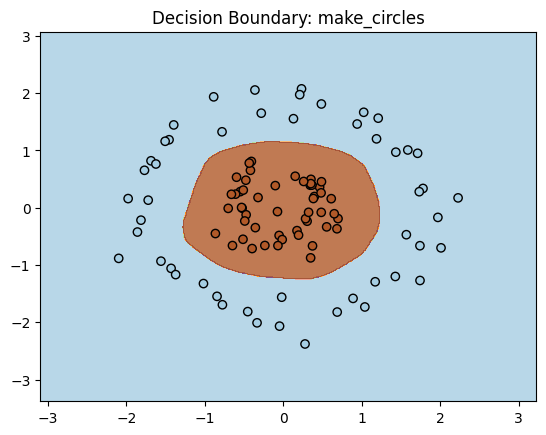

9676/9676 ━━━━━━━━━━━━━━━━━━━━ 7s 721us/step


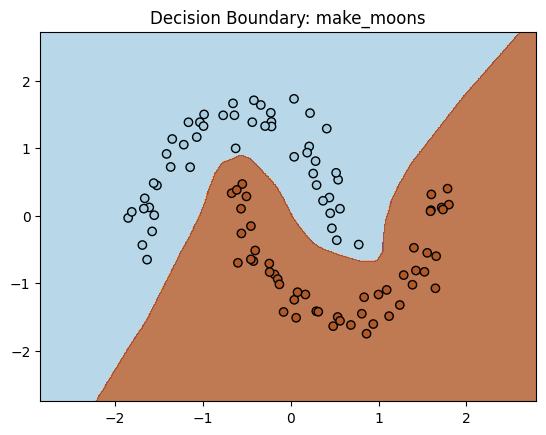

In [6]:
# Decision boundary visualization function
def plot_decision_boundary(X, Y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]
    predictions = model.predict(grid).reshape(xx.shape)
    predictions = (predictions > 0.5).astype(int)  # Binary classification threshold
    plt.contourf(xx, yy, predictions, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# Example: Plot decision boundaries for make_circles
plot_decision_boundary(X_circles, Y_circles, model_circles, "Decision Boundary: make_circles")

# Example: Plot decision boundaries for make_moons
plot_decision_boundary(X_moons, Y_moons, model_moons, "Decision Boundary: make_moons")

Now, apply L1 regularization to your models. In keras, you can add kernel_regularizer=l1(*parameter*) when you define a layer in your model, to add regularization on that layer. Try adding it to some or all layers, and visualise the new decision boundary.

12779/12779 ━━━━━━━━━━━━━━━━━━━━ 8s 643us/step


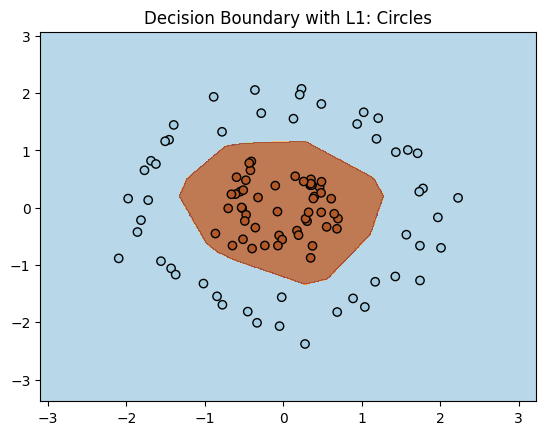

9676/9676 ━━━━━━━━━━━━━━━━━━━━ 6s 610us/step


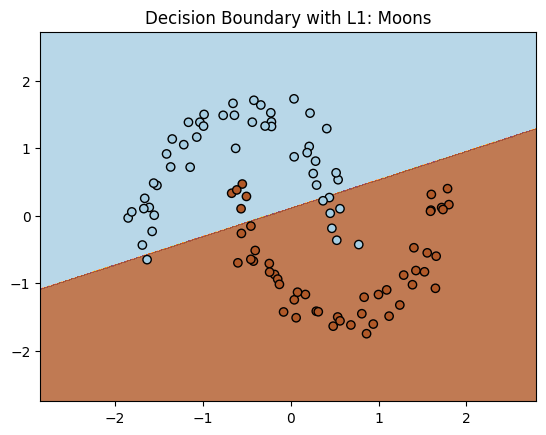

In [7]:
from tensorflow.keras.regularizers import l1

# Input layer
input_circles = Input(shape=(2,))

# Hidden layers with L1 regularization
x = Dense(32, activation='relu', kernel_regularizer=l1(0.01))(input_circles)
x = Dense(64, activation='relu', kernel_regularizer=l1(0.01))(x)
x = Dense(32, activation='relu', kernel_regularizer=l1(0.01))(x)

# Output layer
output_circles = Dense(1, activation='sigmoid')(x)

# Model
model_circles_l1 = Model(inputs=input_circles, outputs=output_circles)

# Compile
model_circles_l1.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


# Input layer
input_moons = Input(shape=(2,))

# Hidden layers with L1 regularization
x = Dense(16, activation='relu', kernel_regularizer=l1(0.01))(input_moons)
x = Dense(16, activation='relu', kernel_regularizer=l1(0.01))(x)
x = Dense(16, activation='relu', kernel_regularizer=l1(0.01))(x)

# Output layer
output_moons = Dense(1, activation='sigmoid')(x)

# Model
model_moons_l1 = Model(inputs=input_moons, outputs=output_moons)

# Compile
model_moons_l1.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


history_circles_l1 = model_circles_l1.fit(X_train_c, Y_train_c, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
history_moons_l1 = model_moons_l1.fit(X_train_m, Y_train_m, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


plot_decision_boundary(X_circles, Y_circles, model_circles_l1, "Decision Boundary with L1: Circles")
plot_decision_boundary(X_moons, Y_moons, model_moons_l1, "Decision Boundary with L1: Moons")


Now, do the same with L2 regularization. In keras, you can add kernel_regularizer=l2(*parameter*).

12779/12779 ━━━━━━━━━━━━━━━━━━━━ 10s 763us/step


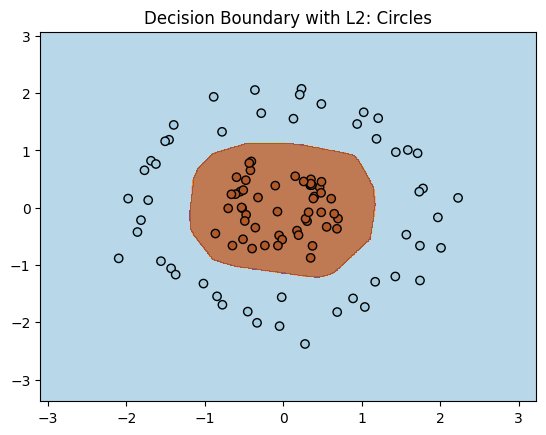

9676/9676 ━━━━━━━━━━━━━━━━━━━━ 7s 760us/step


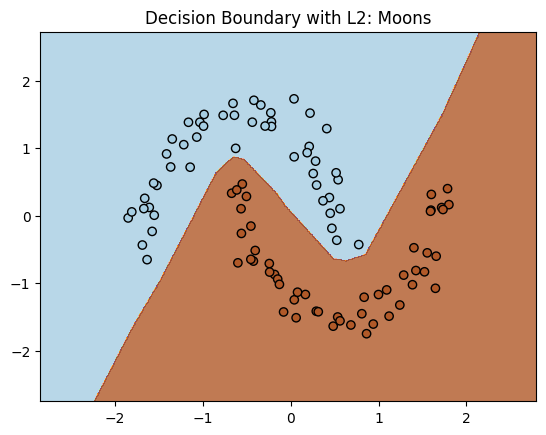

In [8]:
from tensorflow.keras.regularizers import l2

# Input layer
input_circles = Input(shape=(2,))

# Hidden layers with L2 regularization
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(input_circles)
x = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x)

# Output layer
output_circles = Dense(1, activation='sigmoid')(x)

# Model
model_circles_l2 = Model(inputs=input_circles, outputs=output_circles)

# Compile
model_circles_l2.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


# Input layer
input_moons = Input(shape=(2,))

# Hidden layers with L2 regularization
x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(input_moons)
x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(x)

# Output layer
output_moons = Dense(1, activation='sigmoid')(x)

# Model
model_moons_l2 = Model(inputs=input_moons, outputs=output_moons)

# Compile
model_moons_l2.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])



history_circles_l2 = model_circles_l2.fit(X_train_c, Y_train_c, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
history_moons_l2 = model_moons_l2.fit(X_train_m, Y_train_m, epochs=100, batch_size=32, validation_split=0.2, verbose=0)



plot_decision_boundary(X_circles, Y_circles, model_circles_l2, "Decision Boundary with L2: Circles")
plot_decision_boundary(X_moons, Y_moons, model_moons_l2, "Decision Boundary with L2: Moons")

OPTIONAL: Combine the two datasets into one. Train a network to perform the new classification task with a very complex decision boundary. Experiment with regularization to prevent overfitting.